# Forecasting Foreign exchange rates

Student Name : Seshadri Sundarrajan

Supervisor Name: Dr.Jim Duggan

## 4. Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


us_euro_uk_inr = pd.read_csv('Forex_data_preprocessed.csv',index_col=0)
us_euro_uk_inr.index = pd.DatetimeIndex(us_euro_uk_inr.index)
us_euro_uk_inr = us_euro_uk_inr.asfreq('b')
us_euro_uk_inr

,USD_EU,EU_GBP,INR_EU,EU_STOXX50,UK_FTSE100,US_SP500,INR_NIFTY50,Gold_USD,Crude_oil_USD
2000-01-03,1.0155,1.6022,44.2250,4849.22,6665.86,145.44,1592.20,282.7,25.55
2000-01-04,1.0309,1.5879,44.8957,4657.83,6665.86,139.75,1638.70,282.7,25.55
2000-01-05,1.0335,1.5883,45.0089,4541.75,6535.90,140.00,1595.80,281.1,24.91
2000-01-06,1.0324,1.5958,44.9610,4500.69,6447.24,137.75,1617.60,281.4,24.78
2000-01-07,1.0294,1.5916,44.8304,4648.27,6504.75,145.75,1613.30,281.9,24.22
...,...,...,...,...,...,...,...,...,...
2020-05-11,1.0818,1.1398,82.0762,2883.75,5939.73,292.50,9239.20,1698.0,24.14
2020-05-12,1.0864,1.1321,81.5126,2884.20,5994.77,286.67,9196.55,1706.8,25.78
2020-05-13,1.0837,1.1281,81.6351,2810.55,5904.05,281.60,9383.55,1716.4,25.29
2020-05-14,1.0800,1.1291,81.5184,2760.23,5741.54,284.97,9142.75,1740.9,27.56


### 4.2 Forcast Modeling - Univariate

#### 4.2.1 INR / EU

##### 1)  ARIMA 

In [2]:
from  pmdarima.arima import auto_arima

arima_model = auto_arima(us_euro_uk_inr.INR_EU.iloc[:-30],seasonal=False,trace=True,error_action='ignore', suppress_warnings=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=5893.434, BIC=5932.869, Fit time=4.582 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5912.063, BIC=5925.208, Fit time=0.481 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5908.741, BIC=5928.458, Fit time=0.413 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=5908.139, BIC=5927.856, Fit time=0.551 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5911.596, BIC=5918.169, Fit time=0.254 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=5899.046, BIC=5931.908, Fit time=2.966 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=5898.365, BIC=5931.227, Fit time=2.762 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=5899.673, BIC=5945.681, Fit time=2.729 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 0); AIC=5891.216, BIC=5937.223, Fit time=3.743 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_o

In [3]:
arima_model = arima_model.fit(us_euro_uk_inr.INR_EU.iloc[:-30])
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5285
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -2935.714
Date:                Sat, 15 Aug 2020   AIC                           5889.428
Time:                        20:26:44   BIC                           5948.580
Sample:                             0   HQIC                          5910.102
                               - 5285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0148      0.012      1.276      0.202      -0.008       0.038
ar.L1         -0.4711      0.120     -3.926      0.000      -0.706      -0.236
ar.L2         -0.5867      0.112     -5.232      0.0

Storing fitted and predicted values as per the timestamp by appending NA accordingly in order to plot

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

In [5]:
fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,30, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,len(fit[:-30]), axis=0),arima_model.predict(n_periods=30))

pred_conf_int = arima_model.predict(n_periods=30,return_conf_int =True)[1]

arima_inr_forecast = pred[-30:]

from sklearn.metrics import mean_squared_error

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

get_metrics(2,us_euro_uk_inr.INR_EU[-30:],pred[-30:])
get_metrics(4,us_euro_uk_inr.INR_EU[-30:],pred[-30:])


2 weeks forecast metrics
Test RMSE: 0.763284049156413
Test MAPE: 0.80689130688599

4 weeks forecast metrics
Test RMSE: 0.6644542963637708
Test MAPE: 0.6823166184062721



###### Forecast plot

,Actual,Predicted,Fitted
2003-02-17,51.7488,NaN,51.716359
2003-02-18,51.1307,NaN,51.763984
2003-02-19,51.2489,NaN,51.177963
2003-02-20,51.5621,NaN,51.291782
2003-02-21,51.4001,NaN,51.545018
...,...,...,...
2020-05-11,82.0762,82.543160,NaN
2020-05-12,81.5126,82.550292,NaN
2020-05-13,81.6351,82.557396,NaN
2020-05-14,81.5184,82.564683,NaN


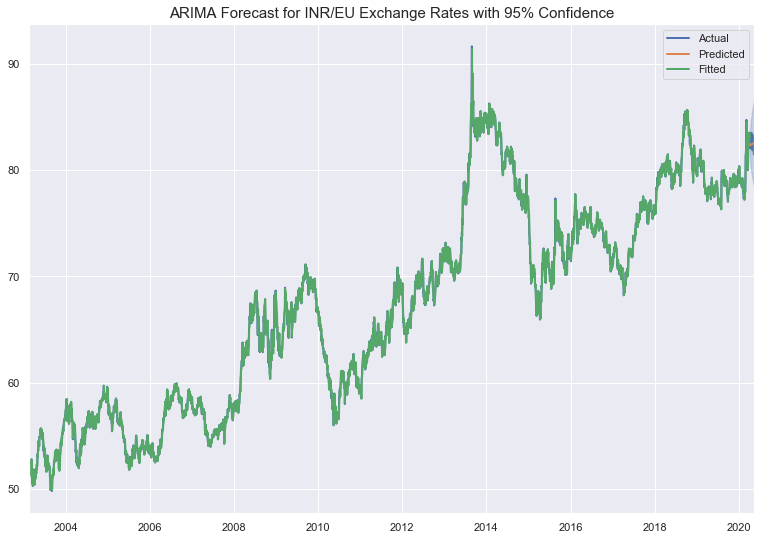

In [6]:
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.INR_EU[-4500:],'Predicted' : pred[-4500:],'Fitted' : fit[-4500:]})
forecast_df.plot(figsize=(13,9),lw=2)

plt.fill_between(forecast_df.index[-30:], pred_conf_int[:,0], pred_conf_int[:,1], color='b', alpha=.25)

plt.title('ARIMA Forecast for INR/EU Exchange Rates with 95% Confidence',size=15)
forecast_df


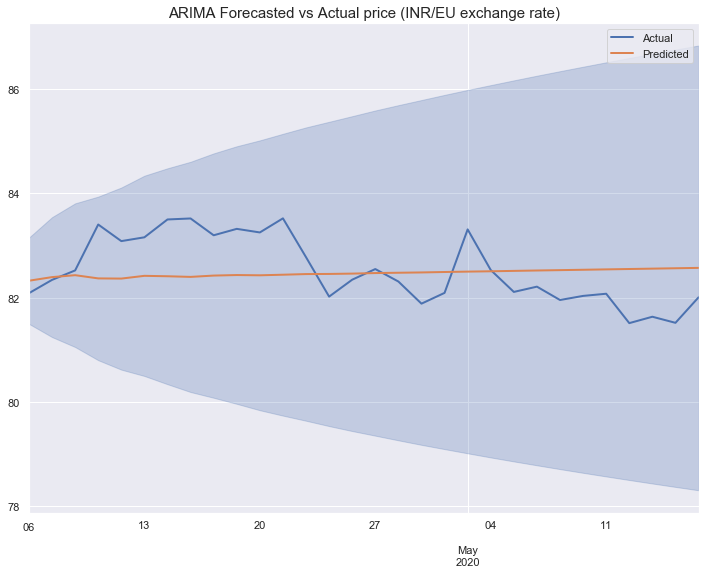

In [7]:
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.INR_EU[-30:],'Predicted' : pred[-30:]})
forecast_df.plot(figsize=(12,9),lw=2)
plt.title('ARIMA Forecasted vs Actual price (INR/EU exchange rate)',size=15)
plt.fill_between(forecast_df.index[-30:], pred_conf_int[:,0], pred_conf_int[:,1], color='b', alpha=.25)



##### Residual Analysis

    -LJung Box test
    -ACF plot

     lb_stat  lb_pvalue
30  9.303228   0.999895


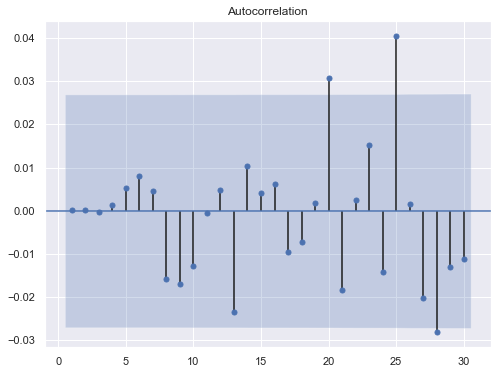

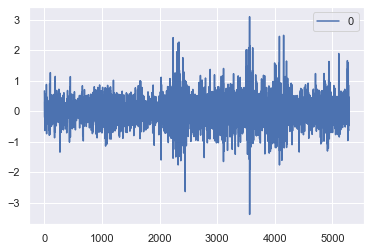

In [8]:
# plot residual errors

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

residuals = pd.DataFrame(arima_model.resid()[1:]) #exclusing 1st residual becoz its not modelled as we took differencing

import statsmodels.api as sm


p = plot_acf(residuals[0:],lags=30,zero=False) 

print(sm.stats.acorr_ljungbox(arima_model.resid(),lags=[30],return_df=True))
residuals.plot()

p.set_size_inches(8, 6)

###### Residual Inference

    -We accept null hypothesis in LJung Box test, which tells model does not show lack of fit (or in simple terms—the model is just fine) or  autocorrelations up to lag k equal zero (that is, the data values are random and independent up to a certain number of lags
    
    -We can also infer the same from acf plot, though we see auto coreelation after 20th lag if we try to model them then we will overfit the data by creating complex model
    
     -Thus Residual is whitenoise and model is able to capture the data well

#### 2) LSTM - Univariate

In [9]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

INR_EU_diff = us_euro_uk_inr.INR_EU.diff().dropna().values.reshape(-1,1)

INR_EU_scaled = scaler.fit_transform(INR_EU_diff)

INR_EU_scaled = np.array([i.item() for i in INR_EU_scaled])


def get_timeseries_lookback(series,lookback):
    x,y = [],[]
    for time in range(lookback,len(series)):
        x.append(series[time-lookback:time])
        y.append(series[time])
    return np.array(x),np.array(y)

x,y = get_timeseries_lookback(INR_EU_scaled,lookback = 5)

x = x.reshape(x.shape[0],x.shape[1],1)
y = y.reshape(y.shape[0],1,1)

train_x,test_x = x[:-30],x[-30:]
train_y,test_y = y[:-30],y[-30:]

print(test_x.shape)
print(len(train_x))

(30, 5, 1)
5279


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# define model
reset_random_seeds()
model = Sequential()
model.add(LSTM(50, input_shape=(5, 1)))
model.add(Dropout(0.15))
model.add(Dense(1))
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=opt, loss='mse')

model_history = model.fit(train_x,train_y,epochs=50,verbose=2,batch_size=30,validation_data=(test_x, test_y),shuffle=False)

Train on 5279 samples, validate on 30 samples
Epoch 1/50
5279/5279 - 3s - loss: 0.0231 - val_loss: 0.0045
Epoch 2/50
5279/5279 - 1s - loss: 0.0054 - val_loss: 0.0045
Epoch 3/50
5279/5279 - 1s - loss: 0.0054 - val_loss: 0.0045
Epoch 4/50
5279/5279 - 1s - loss: 0.0053 - val_loss: 0.0045
Epoch 5/50
5279/5279 - 1s - loss: 0.0053 - val_loss: 0.0045
Epoch 6/50
5279/5279 - 1s - loss: 0.0052 - val_loss: 0.0045
Epoch 7/50
5279/5279 - 1s - loss: 0.0051 - val_loss: 0.0045
Epoch 8/50
5279/5279 - 1s - loss: 0.0051 - val_loss: 0.0045
Epoch 9/50
5279/5279 - 1s - loss: 0.0050 - val_loss: 0.0045
Epoch 10/50
5279/5279 - 1s - loss: 0.0049 - val_loss: 0.0045
Epoch 11/50
5279/5279 - 1s - loss: 0.0049 - val_loss: 0.0045
Epoch 12/50
5279/5279 - 1s - loss: 0.0049 - val_loss: 0.0045
Epoch 13/50
5279/5279 - 1s - loss: 0.0048 - val_loss: 0.0045
Epoch 14/50
5279/5279 - 1s - loss: 0.0048 - val_loss: 0.0045
Epoch 15/50
5279/5279 - 1s - loss: 0.0049 - val_loss: 0.0045
Epoch 16/50
5279/5279 - 1s - loss: 0.0048 - val_

Text(0.5, 0, 'Epoch')

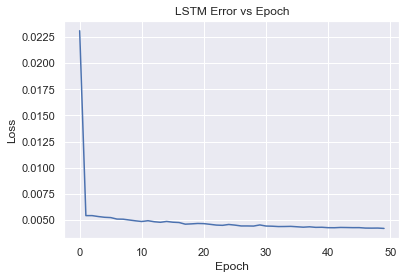

In [12]:
epochs = model_history.params['epochs']
loss = model_history.history['loss']

plt.plot(range(epochs),loss)
plt.title('LSTM Error vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [13]:
def get_price_from_diff(index,value):
    return us_euro_uk_inr.INR_EU[index-1]+value

In [14]:

pred = []
for test in test_x:
    test = test.reshape((test.shape[1],test.shape[0],1))
    yhat = model.predict(test, verbose=0).item()
    pred.append(yhat)


pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
forecast_prices = []

for index,forecast in enumerate(pred):
    if index == 0:
        forecast_prices.append(get_price_from_diff(index - 30,forecast))
    else:
        forecast_prices.append(forecast_prices[len(forecast_prices)-1]+forecast)
    

Text(0.5, 1.0, 'LSTM Forecast for INR/EU Exchange Rates')

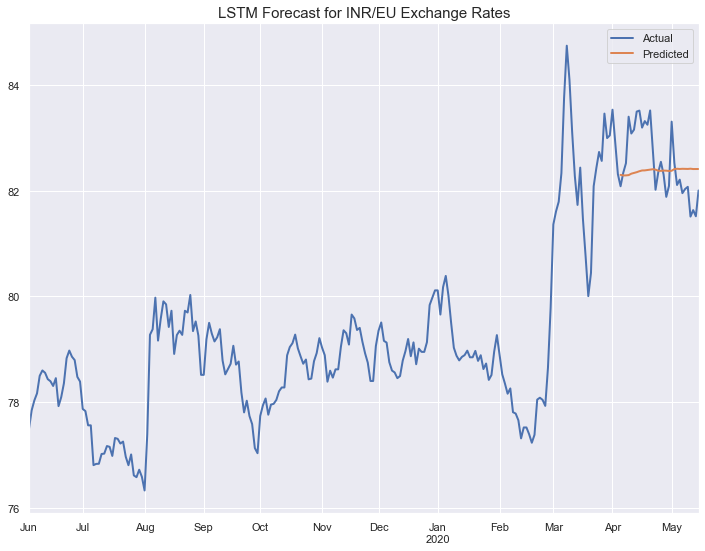

In [15]:

'''
fitted = model.predict(train_x)
fit = scaler.inverse_transform(fitted)
'''

fitted = model.predict(train_x)
fit = []
for index,forecast in enumerate(fitted):
    forecast = scaler.inverse_transform(forecast.reshape(1, -1))
    fit.append(get_price_from_diff(index -5279 - 30,forecast.item()))
    

pred = np.append(np.repeat(np.nan,5279, axis=0),forecast_prices)
fitd = np.append(np.array(fit),np.repeat(np.nan,30, axis=0))
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.INR_EU[-250:],'Predicted' : pred[-250:]})
forecast_df.plot(figsize=(12,9),lw = 2)
plt.title('LSTM Forecast for INR/EU Exchange Rates',size=15)

Text(0.5, 1.0, 'LSTM Forecast Vs Actual INR/EU Exchange Rates')

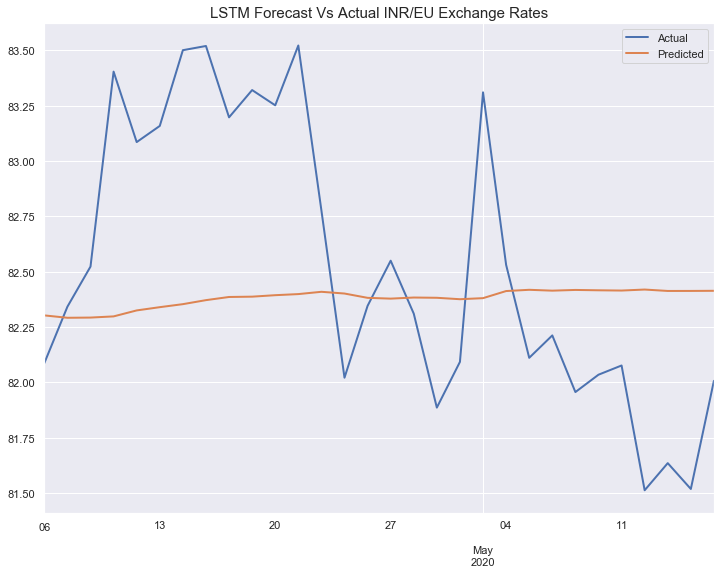

In [16]:
#fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,15, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,5279, axis=0),forecast_prices[-30:])
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.INR_EU[-30:],'Predicted' : pred[-30:]})
forecast_df.plot(figsize=(12,9),lw=2)
plt.title('LSTM Forecast Vs Actual INR/EU Exchange Rates',size=15)

In [17]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

    
forecast_prices = pd.Series(np.array(forecast_prices).reshape(1,-1)[0]).values
lstm_inr_forecast = forecast_prices

get_metrics(2,us_euro_uk_inr.INR_EU[-30:],forecast_prices)
get_metrics(4,us_euro_uk_inr.INR_EU[-30:],forecast_prices)

2 weeks forecast metrics
Test RMSE: 0.8022938967908718
Test MAPE: 0.8538260575920049

4 weeks forecast metrics
Test RMSE: 0.6624255510132688
Test MAPE: 0.6653058751236919



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
from scipy.stats import ttest_ind

ttest_ind(arima_inr_forecast,lstm_inr_forecast)

Ttest_indResult(statistic=6.383506331815941, pvalue=3.153076612626416e-08)

### 4.2 Forcast Modeling - Univariate

#### 4.2.2 EU /GBP

##### 1)  ARIMA 

In [20]:


from  pmdarima.arima import auto_arima

arima_model = auto_arima(us_euro_uk_inr.EU_GBP.iloc[:-30],seasonal=False,trace=True,error_action='ignore', suppress_warnings=True)

arima_model = arima_model.fit(us_euro_uk_inr.EU_GBP.iloc[:-30])
print(arima_model.summary())



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=-37997.705, BIC=-37958.271, Fit time=2.143 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-37990.145, BIC=-37977.000, Fit time=0.680 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-37992.010, BIC=-37972.293, Fit time=0.712 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-37992.337, BIC=-37972.620, Fit time=0.590 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-37991.199, BIC=-37984.627, Fit time=0.234 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=-37995.621, BIC=-37962.758, Fit time=1.774 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-37997.044, BIC=-37964.182, Fit time=3.444 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=-37984.142, BIC=-37938.135, Fit time=1.927 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 0); AIC=-38002.268, BIC=-37956.261, Fit time=2.696 seconds
F

In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

In [22]:
fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,30, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,len(fit[:-30]), axis=0),arima_model.predict(n_periods=30))

pred_conf_int = arima_model.predict(n_periods=30,return_conf_int =True)[1]

arima_gbp_forecast = pred[-30:]

from sklearn.metrics import mean_squared_error

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

get_metrics(2,us_euro_uk_inr.EU_GBP[-30:],pred[-30:])
get_metrics(4,us_euro_uk_inr.EU_GBP[-30:],pred[-30:])

2 weeks forecast metrics
Test RMSE: 0.012812441972777935
Test MAPE: 0.9935985003593236

4 weeks forecast metrics
Test RMSE: 0.013416109390529823
Test MAPE: 1.0519287054033444



###### Forecast plot

,Actual,Predicted
2017-04-04,1.1663,NaN
2017-04-05,1.1714,NaN
2017-04-06,1.1723,NaN
2017-04-07,1.1679,NaN
2017-04-10,1.1708,NaN
...,...,...
2020-05-11,1.1398,1.129103
2020-05-12,1.1321,1.128982
2020-05-13,1.1281,1.128861
2020-05-14,1.1291,1.128803


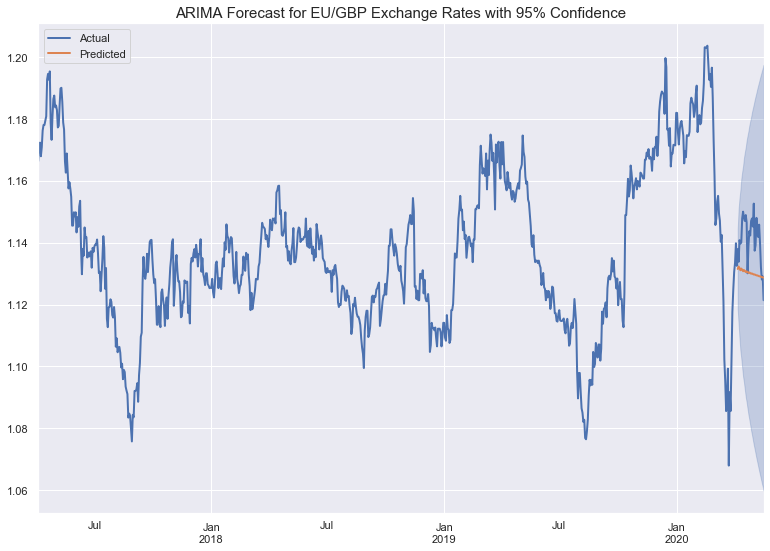

In [23]:
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.EU_GBP[4501:5315],'Predicted' : pred[4500:5315]})
forecast_df.plot(figsize=(13,9),lw=2)

plt.fill_between(forecast_df.index[-30:], pred_conf_int[:,0], pred_conf_int[:,1], color='b', alpha=.25)

plt.title('ARIMA Forecast for EU/GBP Exchange Rates with 95% Confidence',size=15)
forecast_df


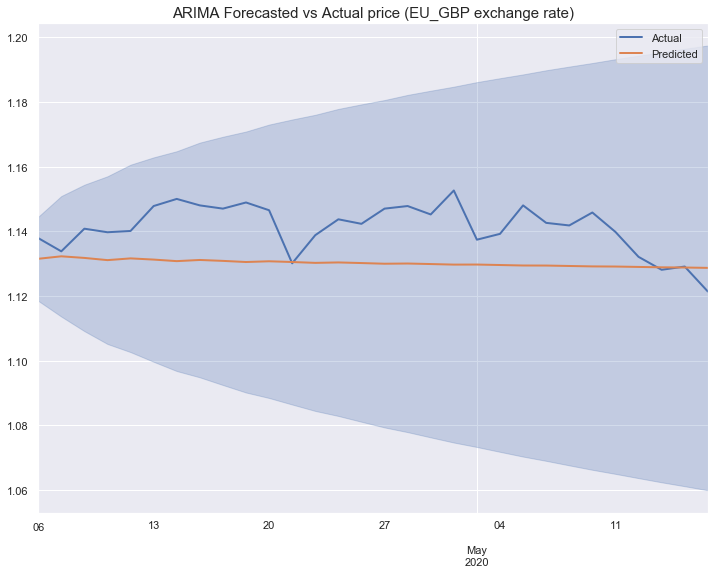

In [24]:
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.EU_GBP[-30:],'Predicted' : pred[-30:]})
forecast_df.plot(figsize=(12,9),lw=2)
plt.title('ARIMA Forecasted vs Actual price (EU_GBP exchange rate)',size=15)
plt.fill_between(forecast_df.index[-30:], pred_conf_int[:,0], pred_conf_int[:,1], color='b', alpha=.25)


##### Residual Analysis

    -LJung Box test
    -ACF plot

    lb_stat  lb_pvalue
30  4.97568        1.0


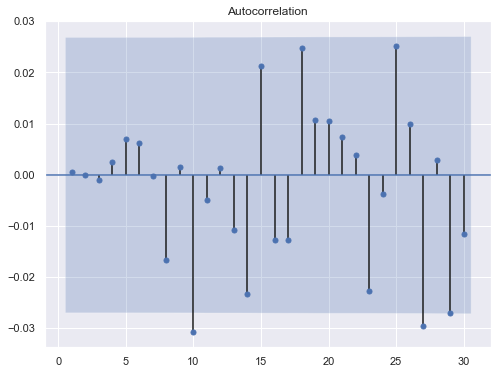

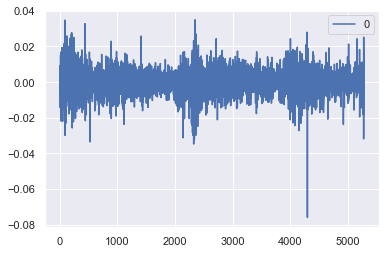

In [25]:
# plot residual errors
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

residuals = pd.DataFrame(arima_model.resid()[1:]) #exclusing 1st residual becoz its not modelled as we took differencing

import statsmodels.api as sm


p = plot_acf(residuals[0:],lags=30,zero=False) 

print(sm.stats.acorr_ljungbox(arima_model.resid(),lags=[30],return_df=True))
residuals.plot()

p.set_size_inches(8, 6)

###### Residual Inference

    -We accept null hypothesis in LJung Box test, which tells model does not show lack of fit (or in simple terms—the model is just fine) or  autocorrelations up to lag k equal zero (that is, the data values are random and independent up to a certain number of lags
    
    -We can also infer the same from acf plot, though we see auto coreelation after 20th lag if we try to model them then we will overfit the data by creating complex model
    
     -Thus Residual is whitenoise and model is able to capture the data well

#### 2) LSTM - Univariate


In [26]:
#### 3) LSTM - Univariate

import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [27]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

EU_GBP_diff = us_euro_uk_inr.EU_GBP.diff().values.reshape(-1,1)[1:]

EU_GBP_scaled = scaler.fit_transform(EU_GBP_diff)

EU_GBP_scaled = np.array([i.item() for i in EU_GBP_scaled])


def get_timeseries_lookback(series,lookback):
    x,y = [],[]
    for time in range(lookback,len(series)):
        x.append(series[time-lookback:time])
        y.append(series[time])
    return np.array(x),np.array(y)

x,y = get_timeseries_lookback(EU_GBP_scaled,lookback = 5)

x = x.reshape(x.shape[0],x.shape[1],1)
y = y.reshape(y.shape[0],1,1)

train_x,test_x = x[:-30],x[-30:]
train_y,test_y = y[:-30],y[-30:]

In [28]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# define model
reset_random_seeds()
model = Sequential()
model.add(LSTM(50, input_shape=(5, 1)))
model.add(Dropout(0.15))
model.add(Dense(1))
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=opt, loss='mse')

model_history = model.fit(train_x,train_y,epochs=25,verbose=2,batch_size=30,validation_data=(test_x, test_y),shuffle=False)



Train on 5279 samples, validate on 30 samples
Epoch 1/25
5279/5279 - 2s - loss: 0.0309 - val_loss: 0.0032
Epoch 2/25
5279/5279 - 1s - loss: 0.0059 - val_loss: 0.0032
Epoch 3/25
5279/5279 - 1s - loss: 0.0058 - val_loss: 0.0032
Epoch 4/25
5279/5279 - 1s - loss: 0.0055 - val_loss: 0.0032
Epoch 5/25
5279/5279 - 1s - loss: 0.0054 - val_loss: 0.0032
Epoch 6/25
5279/5279 - 1s - loss: 0.0055 - val_loss: 0.0032
Epoch 7/25
5279/5279 - 1s - loss: 0.0053 - val_loss: 0.0032
Epoch 8/25
5279/5279 - 1s - loss: 0.0052 - val_loss: 0.0032
Epoch 9/25
5279/5279 - 1s - loss: 0.0049 - val_loss: 0.0032
Epoch 10/25
5279/5279 - 1s - loss: 0.0049 - val_loss: 0.0032
Epoch 11/25
5279/5279 - 1s - loss: 0.0048 - val_loss: 0.0032
Epoch 12/25
5279/5279 - 1s - loss: 0.0048 - val_loss: 0.0032
Epoch 13/25
5279/5279 - 1s - loss: 0.0048 - val_loss: 0.0032
Epoch 14/25
5279/5279 - 1s - loss: 0.0047 - val_loss: 0.0032
Epoch 15/25
5279/5279 - 1s - loss: 0.0046 - val_loss: 0.0032
Epoch 16/25
5279/5279 - 1s - loss: 0.0046 - val_

Text(0.5, 0, 'Epoch')

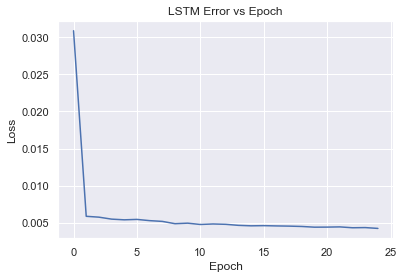

In [29]:
epochs = model_history.params['epochs']
loss = model_history.history['loss']

plt.plot(range(epochs),loss)
plt.title('LSTM Error vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')



In [30]:
def get_price_from_diff(index,value):
    return us_euro_uk_inr.EU_GBP[index-1]+value

In [31]:



pred = []
for test in test_x:
    test = test.reshape((test.shape[1],test.shape[0],1))
    yhat = model.predict(test, verbose=0).item()
    pred.append(yhat)


forecast_prices = []
pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1))

for index,forecast in enumerate(pred):
    if index == 0:
        forecast_prices.append(get_price_from_diff(index - 30,forecast))
    else:
        forecast_prices.append(forecast_prices[len(forecast_prices)-1]+forecast)
        

fitted = model.predict(train_x)
fit = []
for index,forecast in enumerate(fitted):
    forecast = scaler.inverse_transform(forecast.reshape(1, -1))
    fit.append(get_price_from_diff(index -5279 - 30,forecast.item()))
    
        

Text(0.5, 1.0, 'LSTM Forecast for EU/GBP Exchange Rates')

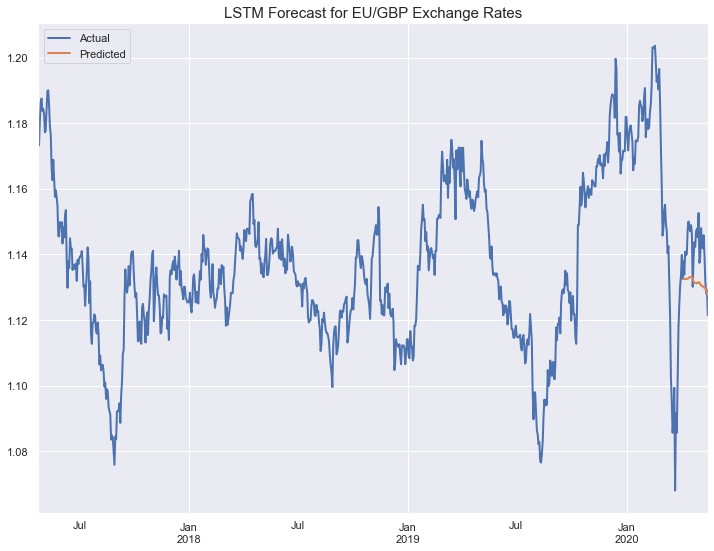

In [32]:
#fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,15, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,5279, axis=0),forecast_prices)
fitd = np.append(np.array(fit),np.repeat(np.nan,30, axis=0))
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.EU_GBP[-800:],'Predicted' : pred[-800:]})
forecast_df.plot(figsize=(12,9),lw = 2)
plt.title('LSTM Forecast for EU/GBP Exchange Rates',size=15)



Text(0.5, 1.0, 'LSTM Forecast Vs Actual EU/GBP Exchange Rates')

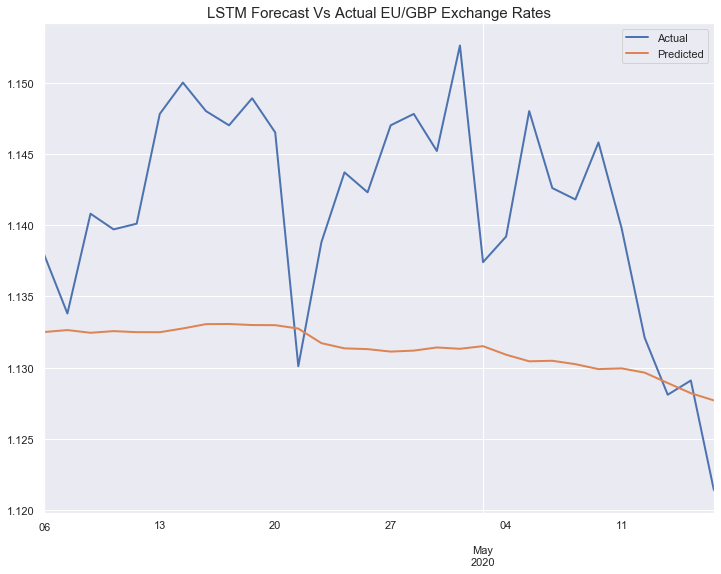

In [33]:
#fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,15, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,5279, axis=0),forecast_prices[-30:])
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.EU_GBP[-30:],'Predicted' : pred[-30:]})
forecast_df.plot(figsize=(12,9),lw=2)
plt.title('LSTM Forecast Vs Actual EU/GBP Exchange Rates',size=15)



In [34]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

forecast_prices = pd.Series(np.array(forecast_prices).reshape(1,-1)[0]).values

lstm_gbp_forecast = forecast_prices


get_metrics(2,us_euro_uk_inr.EU_GBP[-30:],forecast_prices)
get_metrics(4,us_euro_uk_inr.EU_GBP[-30:],forecast_prices)

model.summary()

2 weeks forecast metrics
Test RMSE: 0.011351938244491506
Test MAPE: 0.8894729277376007

4 weeks forecast metrics
Test RMSE: 0.012165168942285188
Test MAPE: 0.9529847660680207

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [35]:
from scipy.stats import ttest_ind

ttest_ind(arima_gbp_forecast,lstm_gbp_forecast)

Ttest_indResult(statistic=-3.602874167838395, pvalue=0.0006541758284551)

### 4.2 Forcast Modeling - Univariate

#### 4.2.3 USD / EU

##### 1)  ARIMA 

In [36]:


from  pmdarima.arima import auto_arima

arima_model = auto_arima(us_euro_uk_inr.USD_EU.iloc[:-30],seasonal=False,trace=True,error_action='ignore', suppress_warnings=True)

arima_model = arima_model.fit(us_euro_uk_inr.USD_EU.iloc[:-30])
print(arima_model.summary())



Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=-37029.291, BIC=-36989.857, Fit time=1.493 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-37031.524, BIC=-37018.379, Fit time=0.595 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-37030.141, BIC=-37010.423, Fit time=1.045 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-37030.165, BIC=-37010.447, Fit time=0.836 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-37033.509, BIC=-37026.937, Fit time=0.218 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-37029.137, BIC=-37002.847, Fit time=1.442 seconds
Total fit time: 5.635 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5285
Model:               SARIMAX(0, 1, 0)   Log Likelihood               18517.755
Date:                Sat, 15 Aug 2020   AIC                        

In [37]:

from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
arima_model = ARIMA(us_euro_uk_inr.USD_EU.iloc[:-30], order=(0,1,0))
arima_model = arima_model.fit()
print(arima_model.summary())


                             ARIMA Model Results                              
Dep. Variable:               D.USD_EU   No. Observations:                 5284
Model:                 ARIMA(0, 1, 0)   Log Likelihood               18517.762
Method:                           css   S.D. of innovations              0.007
Date:                Sat, 15 Aug 2020   AIC                         -37031.524
Time:                        20:28:47   BIC                         -37018.379
Sample:                    01-04-2000   HQIC                        -37026.930
                         - 04-03-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.215e-05      0.000      0.121      0.903      -0.000       0.000


In [38]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

def get_price_from_diff(index,value):
    return us_euro_uk_inr.USD_EU[index-1]+value

In [39]:
#Storing fitted and predicted values as per the timestamp by appending NA accordingly in order to plot
fit = []
for idx,pred in enumerate(arima_model.predict(1,5285)):
    fit.append(get_price_from_diff(idx-5284-30,pred))
    
fit =  np.append(np.array(fit),np.repeat(np.nan,30, axis=0))[1:] # first value is zero since we did differencing

pred = np.append(np.repeat(np.nan,5284, axis=0),arima_model.forecast(steps=30)[0])

pred_conf_int = arima_model.forecast(steps=30,alpha=0.05)[2]

arima_usd_forecast = pred[-30:]

from sklearn.metrics import mean_squared_error

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 7*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

get_metrics(2,us_euro_uk_inr.USD_EU[-30:],pred[-30:])
get_metrics(4,us_euro_uk_inr.USD_EU[-30:],pred[-30:])


2 weeks forecast metrics
Test RMSE: 0.009515697984300435
Test MAPE: 0.7532201637550716

4 weeks forecast metrics
Test RMSE: 0.008717499753439367
Test MAPE: 0.6399191305104759



,Actual,Predicted
2015-05-05,1.1174,NaN
2015-05-06,1.1345,NaN
2015-05-07,1.1283,NaN
2015-05-08,1.1241,NaN
2015-05-11,1.1142,NaN
...,...,...
2020-05-11,1.0818,1.080016
2020-05-12,1.0864,1.080028
2020-05-13,1.0837,1.080040
2020-05-14,1.0800,1.080052


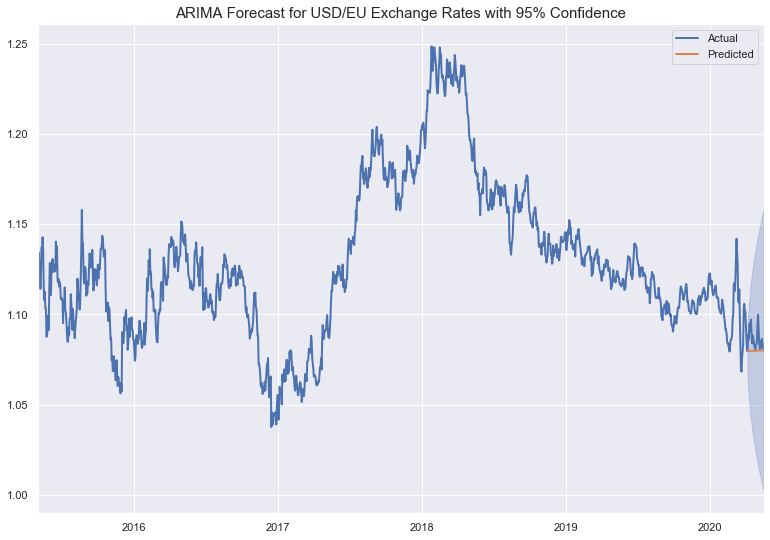

In [40]:
###### Forecast plot

forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.USD_EU[4001:5315],'Predicted' : pred[4000:5315]})
forecast_df.plot(figsize=(13,9),lw=2)

plt.fill_between(forecast_df.index[-30:], pred_conf_int[:,0], pred_conf_int[:,1], color='b', alpha=.25)

plt.title('ARIMA Forecast for USD/EU Exchange Rates with 95% Confidence',size=15)
forecast_df




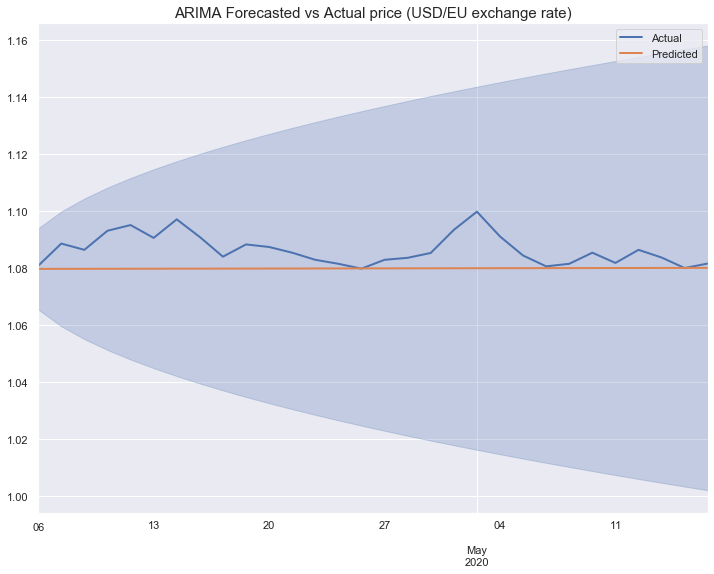

In [41]:

forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.USD_EU[-30:],'Predicted' : pred[-30:]})
forecast_df.plot(figsize=(12,9),lw=2)
plt.title('ARIMA Forecasted vs Actual price (USD/EU exchange rate)',size=15)
plt.fill_between(forecast_df.index[-30:], pred_conf_int[:,0], pred_conf_int[:,1], color='b', alpha=.25)

##### Residual Analysis

    -LJung Box test
    -ACF plot

      lb_stat  lb_pvalue
30  28.222355   0.558655


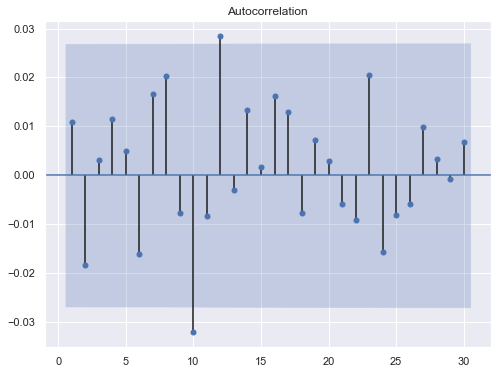

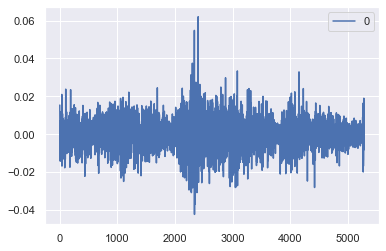

In [42]:


# plot residual errors


residuals = pd.DataFrame(arima_model.resid.values) #exclusing 1st residual becoz its not modelled as we took differencing

import statsmodels.api as sm


p = plot_acf(residuals[0:],lags=30,zero=False) 

print(sm.stats.acorr_ljungbox(arima_model.resid.values,lags=[30],return_df=True))
residuals.plot()

p.set_size_inches(8, 6)

###### Residual Inference

    -We accept null hypothesis in LJung Box test, which tells model does not show lack of fit (or in simple terms—the model is just fine) or  autocorrelations up to lag k equal zero (that is, the data values are random and independent up to a certain number of lags
    
    -We can also infer the same from acf plot, though we see auto coreelation after 20th lag if we try to model them then we will overfit the data by creating complex model
    
     -Thus Residual is whitenoise and model is able to capture the data well

#### 2) LSTM - Univariate

In [43]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

In [44]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

USD_EU_diff = us_euro_uk_inr.USD_EU.diff().values.reshape(-1,1)[1:]

USD_EU_scaled = scaler.fit_transform(USD_EU_diff)

USD_EU_scaled = np.array([i.item() for i in USD_EU_scaled])


def get_timeseries_lookback(series,lookback):
    x,y = [],[]
    for time in range(lookback,len(series)):
        x.append(series[time-lookback:time])
        y.append(series[time])
    return np.array(x),np.array(y)

x,y = get_timeseries_lookback(USD_EU_scaled,lookback = 1)

x = x.reshape(x.shape[0],x.shape[1],1)
y = y.reshape(y.shape[0],1,1)

train_x,test_x = x[:-30],x[-30:]
train_y,test_y = y[:-30],y[-30:]



In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# define model
reset_random_seeds()
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dropout(0.15))
model.add(Dense(1))
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer=opt, loss='mse')

model_history = model.fit(train_x,train_y,epochs=50,verbose=2,batch_size=30,validation_data=(test_x, test_y),shuffle=False)

Train on 5283 samples, validate on 30 samples
Epoch 1/50
5283/5283 - 2s - loss: 0.1168 - val_loss: 0.0748
Epoch 2/50
5283/5283 - 1s - loss: 0.0550 - val_loss: 0.0347
Epoch 3/50
5283/5283 - 1s - loss: 0.0273 - val_loss: 0.0167
Epoch 4/50
5283/5283 - 1s - loss: 0.0150 - val_loss: 0.0086
Epoch 5/50
5283/5283 - 1s - loss: 0.0095 - val_loss: 0.0049
Epoch 6/50
5283/5283 - 1s - loss: 0.0069 - val_loss: 0.0033
Epoch 7/50
5283/5283 - 1s - loss: 0.0058 - val_loss: 0.0026
Epoch 8/50
5283/5283 - 1s - loss: 0.0053 - val_loss: 0.0022
Epoch 9/50
5283/5283 - 1s - loss: 0.0051 - val_loss: 0.0021
Epoch 10/50
5283/5283 - 1s - loss: 0.0050 - val_loss: 0.0020
Epoch 11/50
5283/5283 - 1s - loss: 0.0049 - val_loss: 0.0020
Epoch 12/50
5283/5283 - 1s - loss: 0.0050 - val_loss: 0.0019
Epoch 13/50
5283/5283 - 1s - loss: 0.0049 - val_loss: 0.0019
Epoch 14/50
5283/5283 - 1s - loss: 0.0049 - val_loss: 0.0019
Epoch 15/50
5283/5283 - 1s - loss: 0.0049 - val_loss: 0.0019
Epoch 16/50
5283/5283 - 1s - loss: 0.0049 - val_

Text(0.5, 0, 'Epoch')

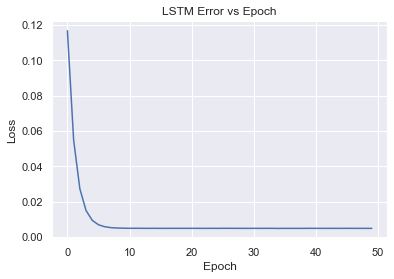

In [47]:
epochs = model_history.params['epochs']
loss = model_history.history['loss']

plt.plot(range(epochs),loss)
plt.title('LSTM Error vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [48]:
def get_price_from_diff(index,value):
    return us_euro_uk_inr.USD_EU[index-1]+value

In [49]:

pred = []
for test in test_x:
    test = test.reshape((test.shape[1],test.shape[0],1))
    yhat = model.predict(test, verbose=0).item()
    pred.append(yhat)


forecast_prices = []
pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1))

for index,forecast in enumerate(pred):
    if index == 0:
        forecast_prices.append(get_price_from_diff(index - 30,forecast))
    else:
        forecast_prices.append(forecast_prices[len(forecast_prices)-1]+forecast)
        

Text(0.5, 1.0, 'LSTM Forecast for USD/EUR Exchange Rates')

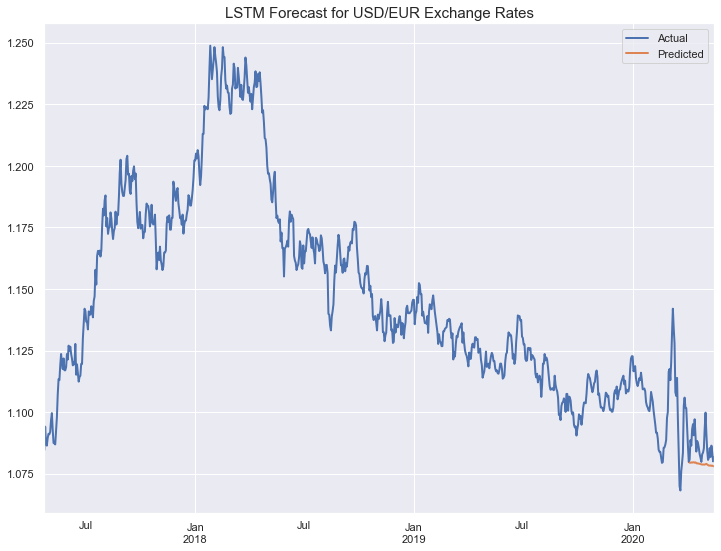

In [50]:


fitted = model.predict(train_x)
fit = []
for index,forecast in enumerate(fitted):
    forecast = scaler.inverse_transform(forecast.reshape(1, -1))
    fit.append(get_price_from_diff(index -5283 - 30,forecast.item()))
    
        
#fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,15, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,5283, axis=0),forecast_prices)
fitd = np.append(np.array(fit),np.repeat(np.nan,30, axis=0))
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.USD_EU[-800:],'Predicted' : pred[-800:]})
forecast_df.plot(figsize=(12,9),lw = 2)
plt.title('LSTM Forecast for USD/EUR Exchange Rates',size=15)

Text(0.5, 1.0, 'LSTM Forecast Vs Actual USD/EUR Exchange Rates')

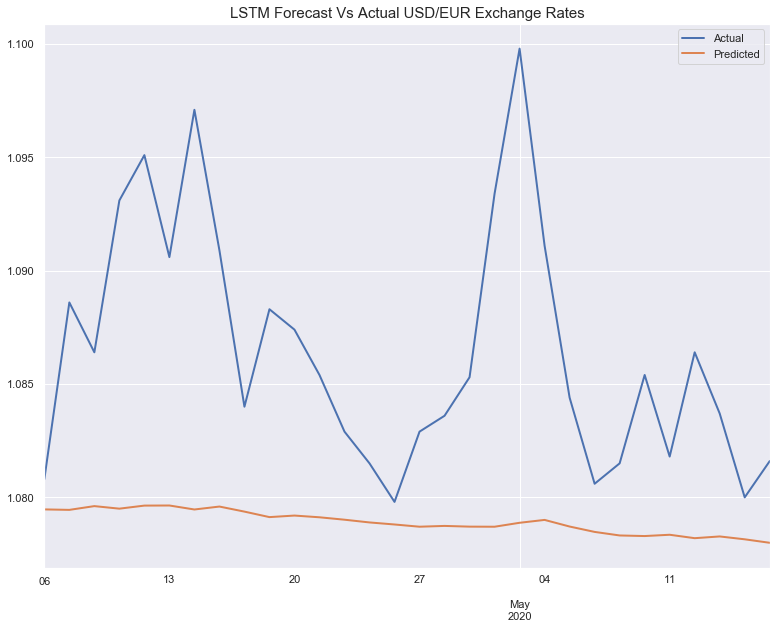

In [55]:
#fit =  np.append(arima_model.predict_in_sample(),np.repeat(np.nan,15, axis=0))[1:] # first value is zero since we did differencing
pred = np.append(np.repeat(np.nan,5283, axis=0),forecast_prices[-30:])
forecast_df = pd.DataFrame({'Actual': us_euro_uk_inr.USD_EU[-30:],'Predicted' : pred[-30:]})
forecast_df.plot(figsize=(13,10),lw=2)
plt.title('LSTM Forecast Vs Actual USD/EUR Exchange Rates',size=15)

In [52]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)*100)

def get_metrics(weeks,actual,pred):
    print('{} weeks forecast metrics'.format(weeks))
    span = 2*weeks
    error = mean_squared_error(actual[:span], pred[:span])
    print('Test RMSE: {}'.format(np.sqrt(error)))
    print('Test MAPE: {}\n'.format(mean_absolute_percentage_error(actual[:span], pred[:span])))

forecast_prices = pd.Series(np.array(forecast_prices).reshape(1,-1)[0]).values
lstm_usd_forecast = forecast_prices

get_metrics(2,us_euro_uk_inr.USD_EU[-30:],forecast_prices)
get_metrics(4,us_euro_uk_inr.USD_EU[-30:],forecast_prices)


model.summary()

2 weeks forecast metrics
Test RMSE: 0.008895403429204442
Test MAPE: 0.7081579662540666

4 weeks forecast metrics
Test RMSE: 0.011803374796287087
Test MAPE: 0.9866721883685581

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [53]:
from scipy.stats import ttest_ind

ttest_ind(arima_usd_forecast,lstm_usd_forecast)

Ttest_indResult(statistic=10.30560291343388, pvalue=1.0052567433742882e-14)